In [1]:

import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from scipy import stats
from importlib import reload
sys.path.insert(1, './functions/')
import os
from utility import create_folder


In [8]:
scale = 5
cm2inch = 0.39
ssmall_SIZE = 3*scale
SMALL_SIZE = 4*scale
MEDIUM_SIZE = 6*scale
BIGGER_SIZE = 8*scale
LINE_WIDTH = 2*2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('lines', linewidth=LINE_WIDTH)


In [9]:
filename ='./results/shuffle_ds_models_depth0.pickle'
with open(filename, 'rb') as f: 
    results = pickle.load(f)
score_ds_cats_models = results['score_ds_cats_models']
p_ds_cats_models = results['p_ds_cats_models']

In [10]:
score_ds_cats_models['pca'].keys()

dict_keys(['LR', 'FB'])

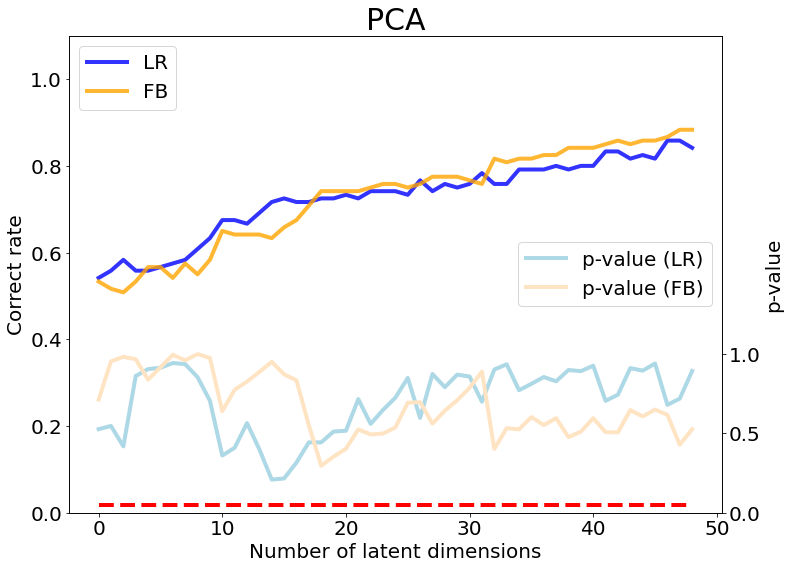

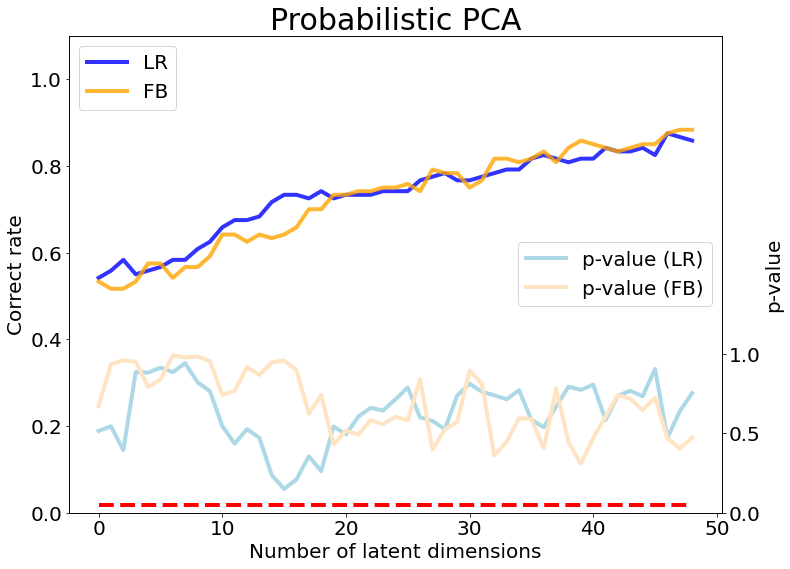

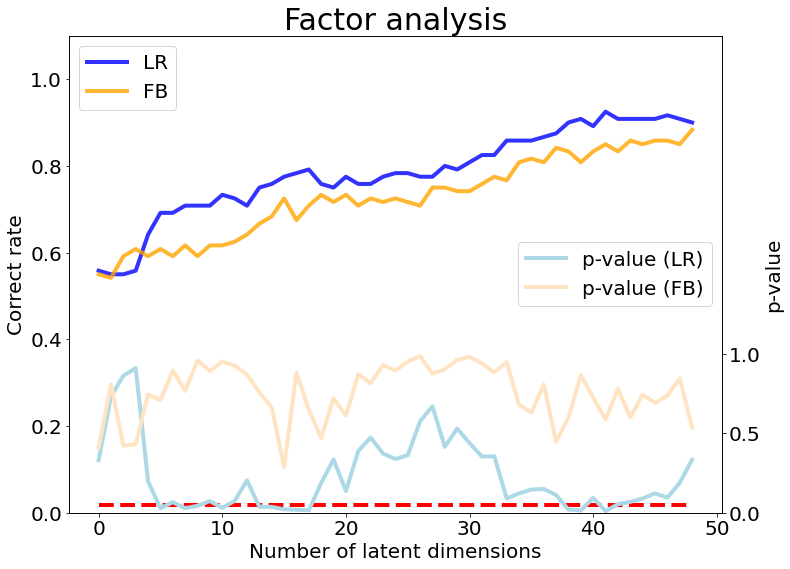

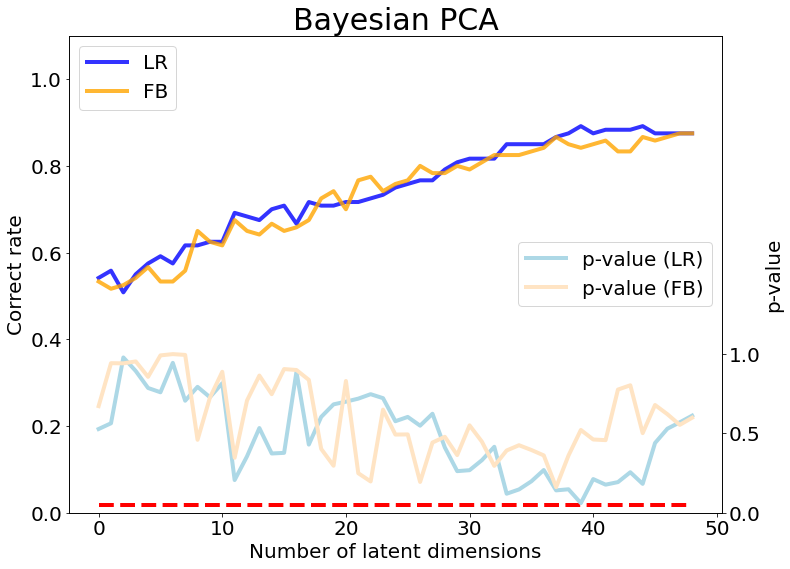

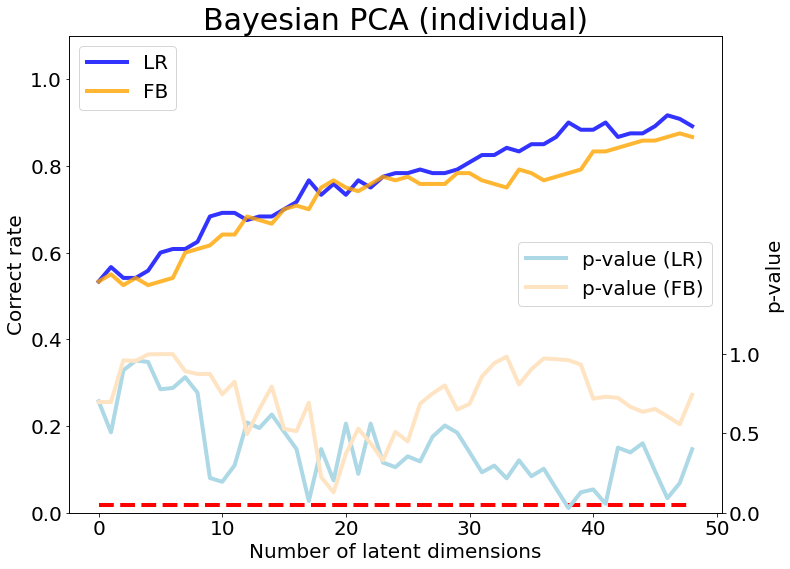

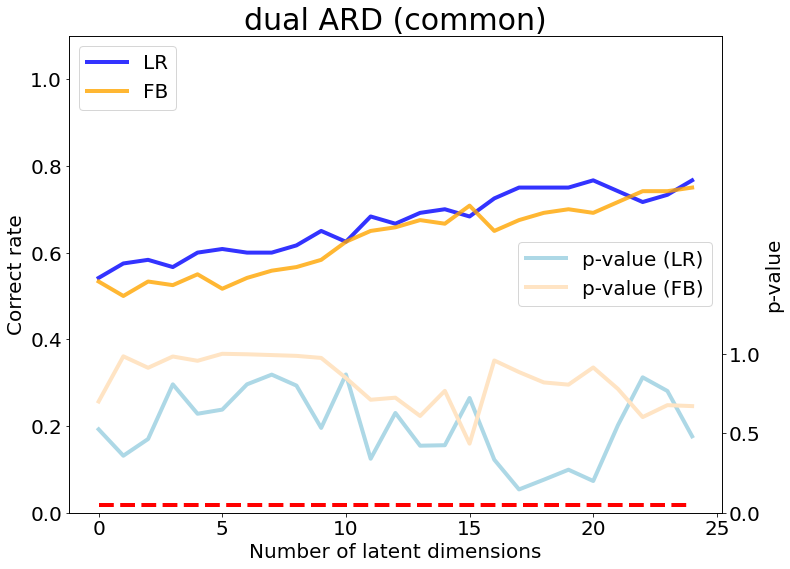

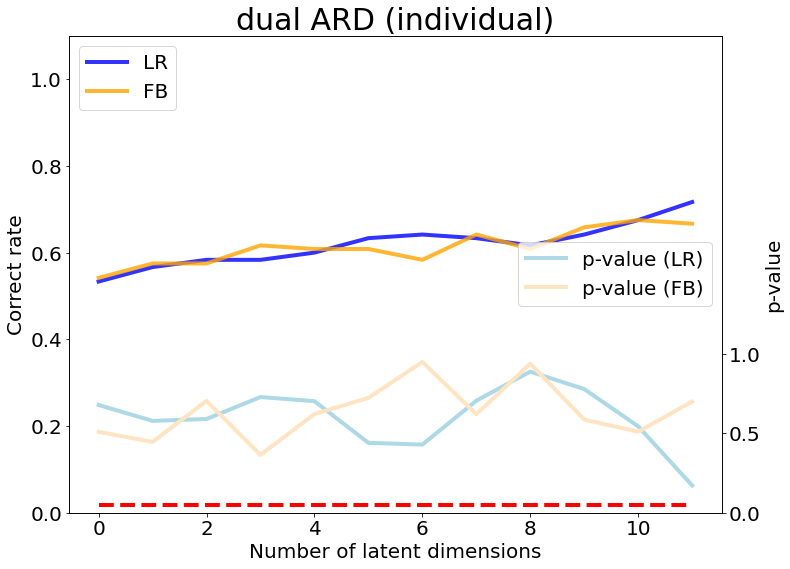

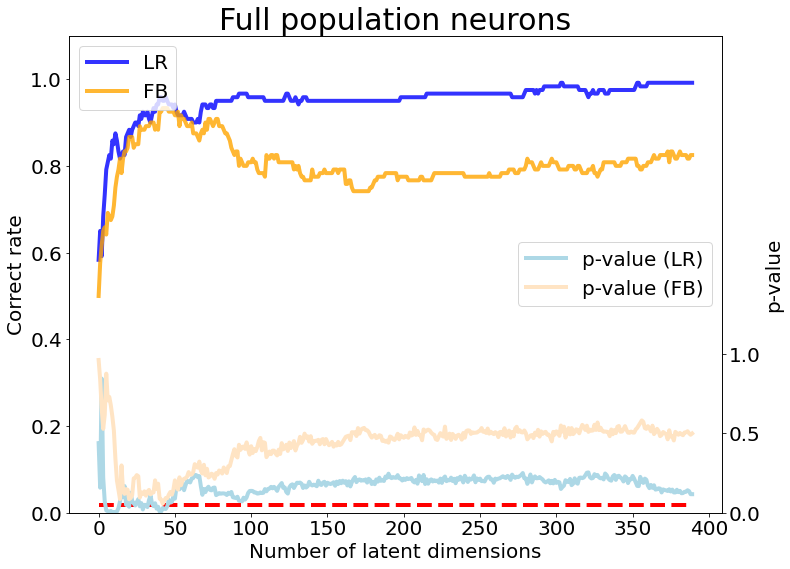

In [15]:
figsize_cm = (6,4.5)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
model_names = list(score_ds_cats_models.keys())
from fun_decoder import get_model_name_labels
model_name_labels = get_model_name_labels(model_names)
cats = list(score_ds_cats_models[model_names[0]].keys())

for i in range(len(model_names)):
        model_name = model_names[i]
        score_ds_cats =score_ds_cats_models[model_name]
        p_ds_cats = p_ds_cats_models[model_name]
        fig, ax = plt.subplots(figsize = figsize )
        ax1 = ax.twinx()
        ax.plot(score_ds_cats[cats[0]].values(),label = cats[0], color ='b', alpha =0.8)
        ax.plot(score_ds_cats[cats[1]].values(),label = cats[1], color ='orange', alpha = 0.8)
        ax.set_ylim([0,1.1])
        ax.set_ylabel('Correct rate')

        ax1.plot(p_ds_cats[cats[0]].values(),label = 'p-value ('+cats[0]+')', color ='lightblue')
        ax1.plot(p_ds_cats[cats[1]].values(),label = 'p-value ('+cats[1]+')', color ='bisque')
        ax1.set_ylim([0,3])
        ax1.set_yticks(np.arange(0,1.1,0.5))
        ax1.set_ylabel('p-value')
        ax1.hlines(y = 0.05, xmin = 0, xmax = len(score_ds_cats[cats[0]])-1,color ='r', linestyles='--')
        ax.legend(loc ='upper left')
        ax1.legend(loc = 'center right')
        ax.set_title(model_name_labels[i])
        ax.set_xlabel('Number of latent dimensions')
        savepath ='./figs/decoder/'
        figname ='score_p_ds_'+model_name+'.pdf'
        figfile = os.path.join(savepath,figname)
        fig.savefig(figfile,bbox_inches='tight' )
        plt.show()



